# Simple Gru
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading df

In [6]:
df = pd.read_csv('BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [7]:
df = df.drop(['High','Low','Adj Close','Volume','Close'], axis=1)
df.head()

,Open
Date,
2022-01-22,36471.589844
2022-01-23,35047.359375
2022-01-24,36275.734375
2022-01-25,36654.804688
2022-01-26,36950.515625


In [8]:
dataset = df.values
dataset = dataset.astype('float64')
dataset[:5]

array([[36471.589844],
       [35047.359375],
       [36275.734375],
       [36654.804688],
       [36950.515625]])

### plotting data

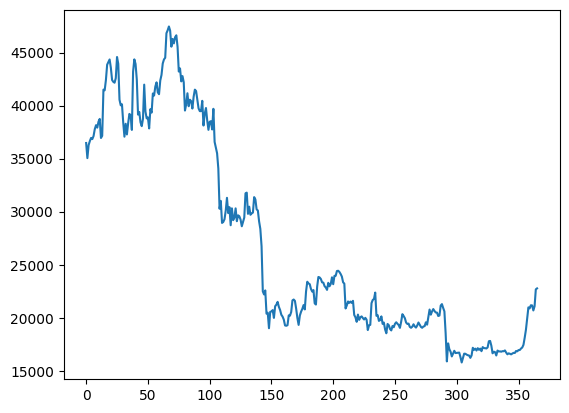

In [9]:
plt.plot(dataset)
plt.show()

### normalizing data

In [10]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[:5],'\n')
print(dataset.shape)

[[0.65318238]
 [0.60821794]
 [0.64699902]
 [0.65896666]
 [0.66830256]] 

(366, 1)


### Method for making data and timestep

In [11]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),0])
        data_y.append(dataset[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [12]:
train_size = int(len(dataset) * 0.90)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(329, 1)
(37, 1)


In [13]:
train[:3]

array([[0.65318238],
       [0.60821794],
       [0.64699902]])

### Making data train & test x,y

In [14]:
n_steps = 5 #timestep or look_up

train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

In [15]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(323, 5) (323,)
(31, 5) (31,)


In [16]:
train_y[:3]

array([0.66487279, 0.67391999, 0.69451282])

In [17]:
for i in range(len(test_x)):   
    print(test_x[i],test_y[i])

# print(train_x[:5],'\n')
# print(train_y[:5])

[0.0272989  0.03199121 0.03083671 0.02082067 0.03542986] 0.032710125925499434
[0.03199121 0.03083671 0.02082067 0.03542986 0.03271013] 0.03306573176845201
[0.03083671 0.02082067 0.03542986 0.03271013 0.03306573] 0.032034370033292625
[0.02082067 0.03542986 0.03271013 0.03306573 0.03203437] 0.0336296324750503
[0.03542986 0.03271013 0.03306573 0.03203437 0.03362963] 0.03346369953860345
[0.03271013 0.03306573 0.03203437 0.03362963 0.0334637 ] 0.035895964561643845
[0.03306573 0.03203437 0.03362963 0.0334637  0.03589596] 0.029490496457610538
[0.03203437 0.03362963 0.0334637  0.03589596 0.0294905 ] 0.024310379356305034
[0.03362963 0.0334637  0.03589596 0.0294905  0.02431038] 0.027120448578457468
[0.0334637  0.03589596 0.0294905  0.02431038 0.02712045] 0.02593160159110902
[0.03589596 0.0294905  0.02431038 0.02712045 0.0259316 ] 0.024171207801618355
[0.0294905  0.02431038 0.02712045 0.0259316  0.02417121] 0.02662098487030512
[0.02431038 0.02712045 0.0259316  0.02417121 0.02662098] 0.02862062794

### Converting data to three-dimensional or three-channel
- The input must be three-dimensional or three-channel, that's why we reshape it


In [18]:
trainxr = np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
testxr = np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

print(trainxr.shape)
print(testxr.shape)

(323, 5, 1)
(31, 5, 1)


In [19]:
train_x = trainxr
test_x = testxr

### training model

In [43]:
n_features = 1 
model = Sequential()
model.add(GRU(30, activation = 'tanh', input_shape=(n_steps, n_features)))  
model.add(Dense(1)) #n-output  
model.compile(optimizer='RMSprop',loss='mse',metrics=['accuracy'])   
# model.summary()

In [50]:
#verbose is the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing
model.fit(train_x, train_y, epochs=400, shuffle=False, batch_size=2)

Epoch 1/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 2/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 3/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 4/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 5/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 6/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 7/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 8/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 9/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 10/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accura

162/162 [==============================] - 1s 5ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 82/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.0062
Epoch 83/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 84/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 85/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 86/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 87/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 88/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0062
Epoch 89/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.0062
Epoch 90/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 

162/162 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.0062
Epoch 161/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.0062
Epoch 162/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.0062
Epoch 163/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0017 - accuracy: 0.0062
Epoch 164/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.0062
Epoch 165/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.0062
Epoch 166/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.0062
Epoch 167/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.0062
Epoch 168/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.0062
Epoch 169/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0018 - a

162/162 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 240/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 241/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 242/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 243/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 244/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 245/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 246/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 247/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - accuracy: 0.0062
Epoch 248/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0022 - a

162/162 [==============================] - 1s 5ms/step - loss: 0.0025 - accuracy: 0.0062
Epoch 319/400
162/162 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 320/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 321/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 322/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 323/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 324/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 325/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 326/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.0062
Epoch 327/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0024 - a

162/162 [==============================] - 1s 5ms/step - loss: 0.0021 - accuracy: 0.0062
Epoch 398/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0021 - accuracy: 0.0062
Epoch 399/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.0062
Epoch 400/400
162/162 [==============================] - 1s 5ms/step - loss: 0.0020 - accuracy: 0.0062


### saving model

In [25]:
model.save('/content/drive/MyDrive/savedata')

In [26]:
# loading model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/savedata')

### Testing model

In [52]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)
print('predicted y(train):', np.reshape(predict_train[:5],-1))
print('real y(train):', train_y[:5])

1/1 [==============================] - 0s 24ms/step
predicted y(train): [0.36116022 0.35562187 0.36611307 0.3770253  0.3803614 ]
real y(train): [0.66487279 0.67391999 0.69451282 0.70623209 0.69891907]


In [53]:
predict_train = scaler.inverse_transform(predict_train)
trainy = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
testy = scaler.inverse_transform([test_y])

In [54]:
print(predict_train[:5])

[[27221.906]
 [27046.48 ]
 [27378.785]
 [27724.426]
 [27830.094]]


### creating df and plotting

In [57]:
Answer1 = pd.DataFrame({
    "Predicted": predict_train.ravel(),
    "real": trainy.ravel()
}) 
Answer1.head()

,Predicted,real
0,27221.906250,36841.878906
1,27046.480469,37128.445313
2,27378.785156,37780.714844
3,27724.425781,38151.917969
4,27830.093750,37920.281250


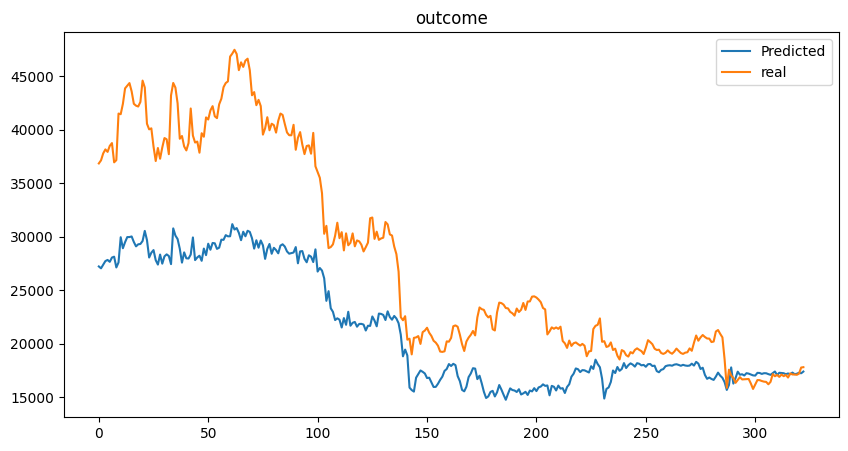

In [58]:
#train
Answer1.plot(title="outcome", figsize=(10,5));

In [126]:
# xx2 = test_x.reshape(-1,1)
# xx2 = scaler.inverse_transform(xx2)
# xx2[:8]

In [59]:
Answer2 = pd.DataFrame({
    "Predicted": predict_test.ravel(),
    "real": testy.ravel()
}) 
Answer2.head()

,Predicted,real
0,17349.595703,16818.380859
1,17103.851562,16829.644531
2,17150.343750,16796.976563
3,17254.197266,16847.505859
4,17176.451172,16842.250000


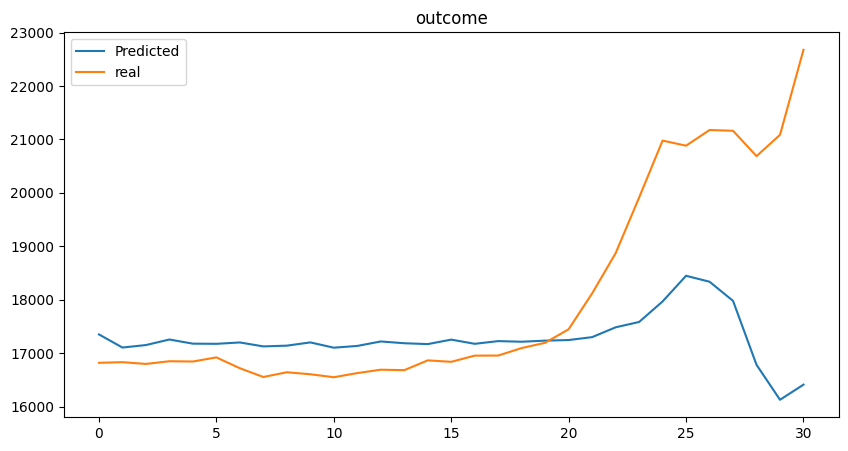

In [60]:
#test
Answer2.plot(title="outcome", figsize=(10,5));

### Evaluate the model

In [61]:
model.evaluate(test_x, test_y)

1/1 [==============================] - 0s 491ms/step - loss: 0.0040 - accuracy: 0.0000e+00


[0.003983131144195795, 0.0]

In [62]:
train_score = math.sqrt(mean_squared_error(trainy.reshape(-1),predict_train))
print('rmse ', train_score)
test_score = math.sqrt(mean_squared_error(test_y.reshape(-1),predict_test))
print('rmse ', test_score)

rmse  7946.367689870623
rmse  17277.34666236674


### new testing
- we must change dim

In [63]:
test_x.shape , test_y.shape

((31, 5, 1), (31,))

In [64]:
test_ = array([0.0272989,  0.03199121, 0.03083671, 0.02082067, 0.03542986])
test_ = test_.reshape(1,n_steps,n_features)
test_.shape

(1, 5, 1)

In [65]:
y_hat = model.predict(test_)
y_hat

1/1 [==============================] - 0s 23ms/step


array([[0.04948103]], dtype=float32)

In [66]:
y_hat = scaler.inverse_transform(y_hat)
y_hat

array([[17349.592]], dtype=float32)